In [ ]:
# Подключ. библиотек
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import plot_model

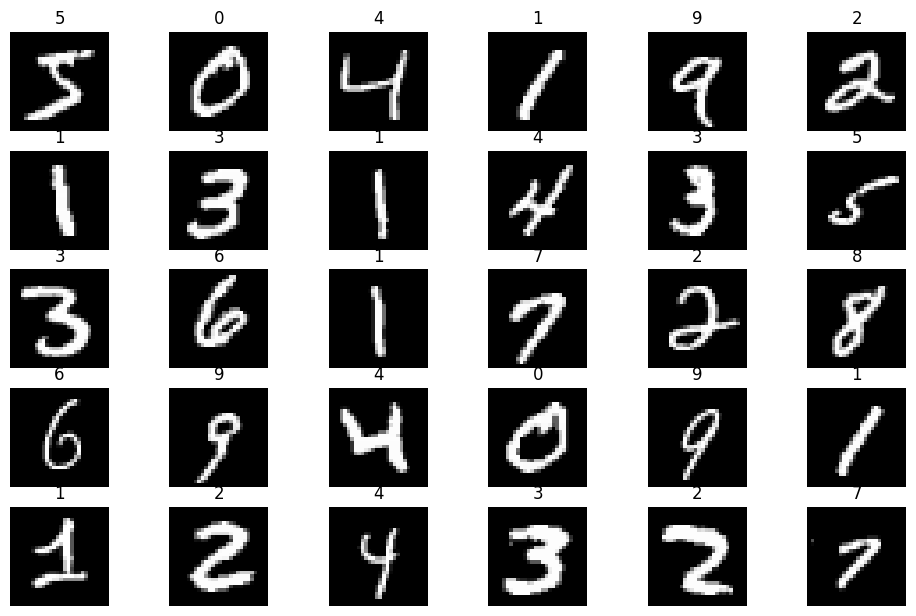

In [36]:
# Загрузка данных a и b (обуч) - c и d (тестов.)
(a, b), (c, d) = tf.keras.datasets.mnist.load_data()

a, c = a / 255.0, c / 255.0

# Обучающий набор из mnist
plt.figure(figsize=(12,9))
for i in range(30):
    plt.subplot(6,6,i+1)
    plt.imshow(a[i], cmap='gray')
    plt.title(str(b[i]))
    plt.axis('off')
plt.show()

In [37]:
# Обучение модели
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(16)
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(a, b, epochs=12, validation_data=(c, d))

# Оценка точности модели
test_loss, test_acc = model.evaluate(c, d, verbose=2)
print('\nТочность тестовом наборе:', test_acc)

Epoch 1/12
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2122 - accuracy: 0.9362 - val_loss: 0.1152 - val_accuracy: 0.9619
Epoch 2/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0856 - accuracy: 0.9732 - val_loss: 0.0851 - val_accuracy: 0.9764
Epoch 3/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0570 - accuracy: 0.9819 - val_loss: 0.0987 - val_accuracy: 0.9698
Epoch 4/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0443 - accuracy: 0.9862 - val_loss: 0.0696 - val_accuracy: 0.9785
Epoch 5/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0343 - accuracy: 0.9893 - val_loss: 0.0724 - val_accuracy: 0.9794
Epoch 6/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0292 - accuracy: 0.9905 - val_loss: 0.0777 - val_accuracy: 0.9768
Epoch 7/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0225 - accuracy: 0.9929 - val_loss: 0.0783 - val_accuracy

# Новый раздел

313/313 [==============================] - 1s 2ms/step


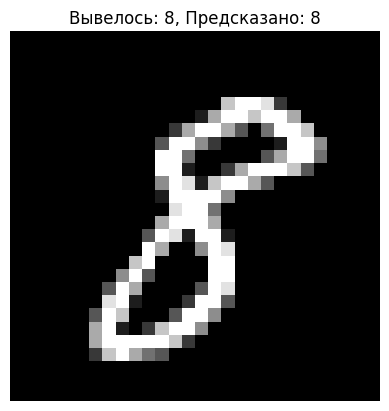

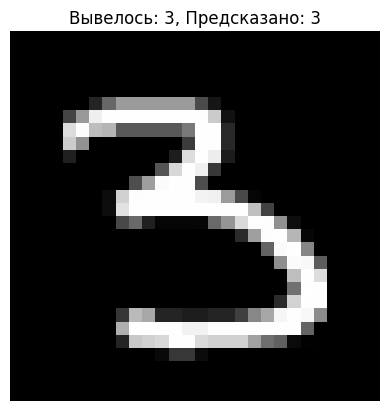

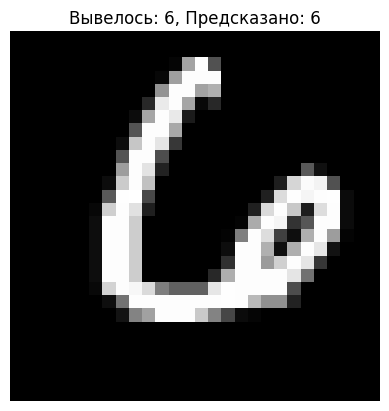

In [44]:
# Вывод случайных изображений для проверки работы модели
predictions = model.predict(c)
random_indices = np.random.choice(len(c), size=3, replace=False)
for id in random_indices:
    plt.imshow(c[id], cmap='gray')
    plt.title(f"Вывелось: {d[id]}, Предсказано: {np.argmax(predictions[id])}")
    plt.axis('off')
    plt.show()



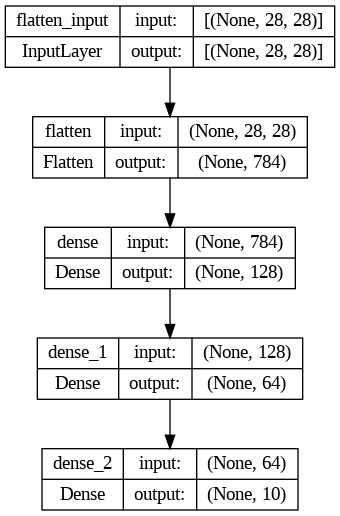

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)